# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('car data.csv')

# 2. Data exploration

In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Dealing with null values

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# categorical columns
cat_col=df.select_dtypes(include=['O']).columns
cat_col

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [9]:
# numerical columns
numeric_col=df.select_dtypes(include=['int64','float']).columns
numeric_col

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [10]:
df = df.drop(columns='Car_Name')

In [11]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
# add a column
df['Current Year'] = 2021

In [13]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [14]:
df['Years Old'] = df['Current Year'] - df['Year']

In [15]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,Years Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [16]:
df= df.drop(columns=['Current Year', 'Year'])

In [17]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


Encoding the categorical data

In [18]:
df.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [19]:
# one hot encoding
df = pd.get_dummies(data=df, drop_first=True)

In [20]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


# 3.Exploratory Data Analysis

C:\Users\Nitin\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

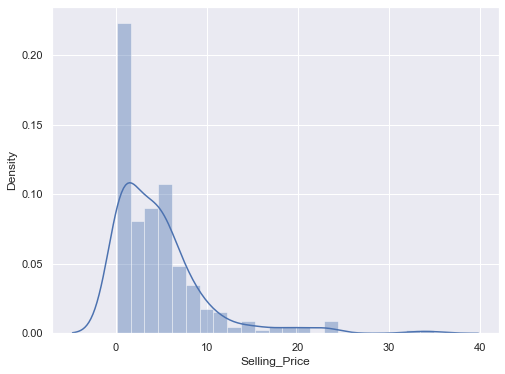

In [21]:
#Target Variable
plt.figure(figsize=(8,6))
sns.set()
sns.distplot(df.Selling_Price,kde=True)

In [22]:
df2 = df.drop(columns='Selling_Price')

<AxesSubplot:title={'center':'Correlated with Selling Price'}>

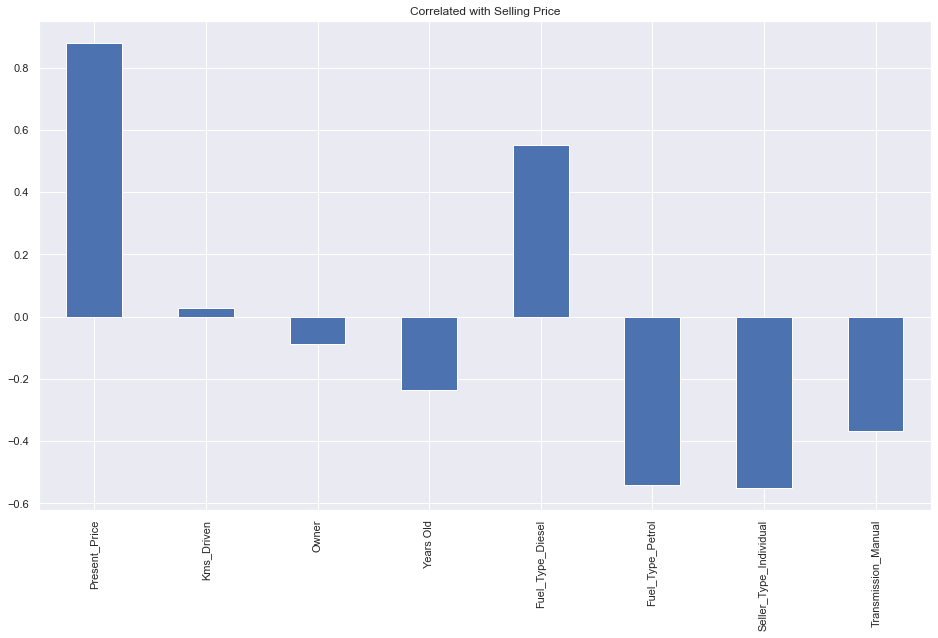

In [23]:
df2.corrwith(df['Selling_Price']).plot.bar(
    figsize=(16,9), title='Correlated with Selling Price', grid=True
)

HeatMap

In [24]:
corr = df.corr()

<AxesSubplot:>

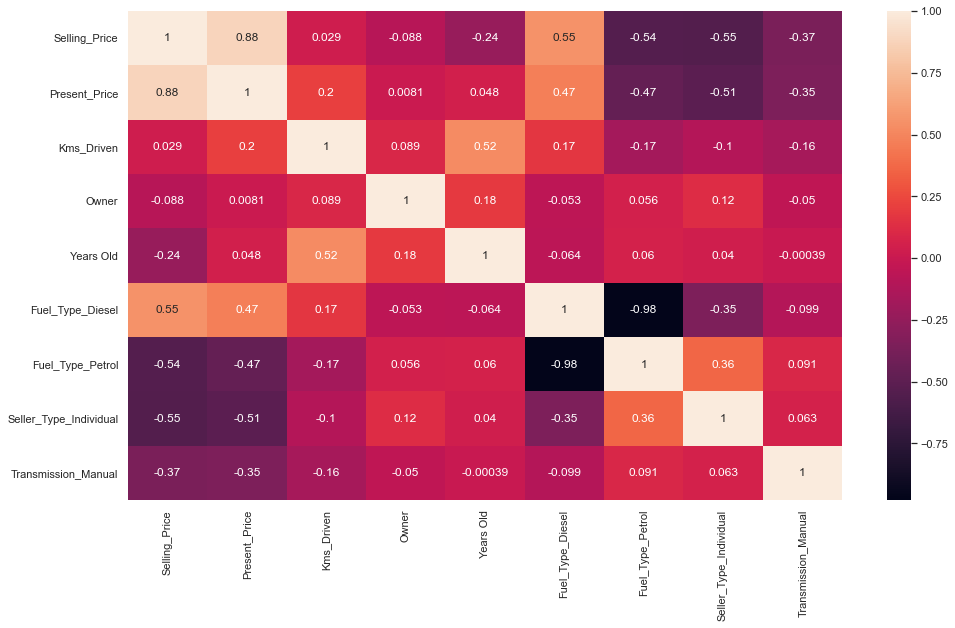

In [25]:
# heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True)

# 4.Splitting the dataset

In [26]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [27]:
# matrix of features
x = df.drop(columns='Selling_Price')

In [28]:
# target variable
y = df['Selling_Price']

In [29]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [30]:

print(model.feature_importances_)

[0.36131078 0.03871682 0.00039912 0.07570058 0.24532102 0.00916073
 0.12670329 0.14268766]


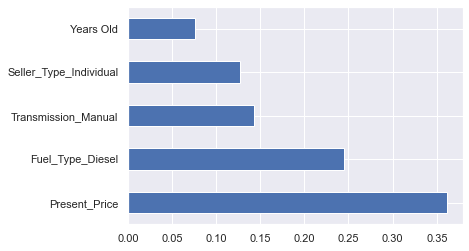

In [31]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [33]:
x_train.shape

(240, 8)

In [34]:
y_train.shape

(240,)

In [35]:
x_test.shape

(61, 8)

In [36]:
y_test.shape

(61,)

# 5: Building the model

1) Multiple linear regression

In [37]:
from sklearn.linear_model import LinearRegression
regressor_mlr = LinearRegression()
regressor_mlr.fit(x_train, y_train)

LinearRegression()

In [38]:
y_train_pred=regressor_mlr.predict(x_train)
y_test_pred = regressor_mlr.predict(x_test)

In [39]:
from sklearn.metrics import r2_score, mean_squared_error

In [40]:
def metrics(y_actual,y_pred):
  r2 = r2_score(y_actual,y_pred)
  rmse = np.sqrt(mean_squared_error(y_actual,y_pred))
  print(" R2 - value : {} | RMSE - value : {}".format(round(r2,2),round(rmse,2)))

In [41]:
print("Train Set")
metrics(y_train,y_train_pred)
print("Test")
metrics(y_test,y_test_pred)

Train Set
 R2 - value : 0.87 | RMSE - value : 1.81
Test
 R2 - value : 0.91 | RMSE - value : 1.47


2) Random forest regression

In [42]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf= RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
y_train_pred=regressor_rf.predict(x_train)
y_test_pred = regressor_rf.predict(x_test)

In [44]:
print("Train Set")
metrics(y_train,y_train_pred)
print("Test")
metrics(y_test,y_test_pred)

Train Set
 R2 - value : 0.98 | RMSE - value : 0.63
Test
 R2 - value : 0.96 | RMSE - value : 1.02


# 6.Finding the optimal parameters using GridSearchCV

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
parameters = {
    'n_estimators':[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion':['mse', 'mae'],
    'max_depth':[10, 20, 30, 40, 50],
    'min_samples_split':[2, 5, 10, 20, 50],
    'min_samples_leaf':[1, 2, 5, 10],
    'max_features':['auto', 'sqrt', 'log2']
}

In [47]:
random_cv = RandomizedSearchCV(estimator=regressor_rf, param_distributions=parameters, n_iter=10,
                               scoring='neg_mean_absolute_error', cv=5, verbose=2, n_jobs=-1)

In [48]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [49]:
random_cv.best_estimator_

RandomForestRegressor(max_depth=40, min_samples_split=5, n_estimators=500)

In [50]:
random_cv.best_score_

-0.6907344796643178

In [51]:
random_cv.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'criterion': 'mse'}

# 7.Final model (Random forest)

In [52]:
y_train_pred=random_cv.predict(x_train)
y_test_pred =random_cv.predict(x_test)

In [53]:
print("Train Set")
metrics(y_train,y_train_pred)
print("Test")
metrics(y_test,y_test_pred)

Train Set
 R2 - value : 0.98 | RMSE - value : 0.74
Test
 R2 - value : 0.96 | RMSE - value : 1.07


In [54]:

import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_cv, file)